In [11]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('healthcare_data.csv')
df

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol_Level,BMI,Physical_Activity,Family_History,Diabetes
0,1,56,Female,175,296,21.6,Medium,No,1
1,2,69,Female,83,239,29.4,High,Yes,0
2,3,46,Female,173,296,24.1,Low,Yes,1
3,4,32,Female,102,297,22.3,Low,Yes,0
4,5,60,Male,94,245,23.0,Low,Yes,0
...,...,...,...,...,...,...,...,...,...
95,96,46,Male,159,203,34.0,Medium,Yes,0
96,97,35,Female,172,207,34.1,Medium,No,0
97,98,43,Male,82,216,32.7,High,No,0
98,99,61,Male,99,253,28.8,Medium,Yes,0


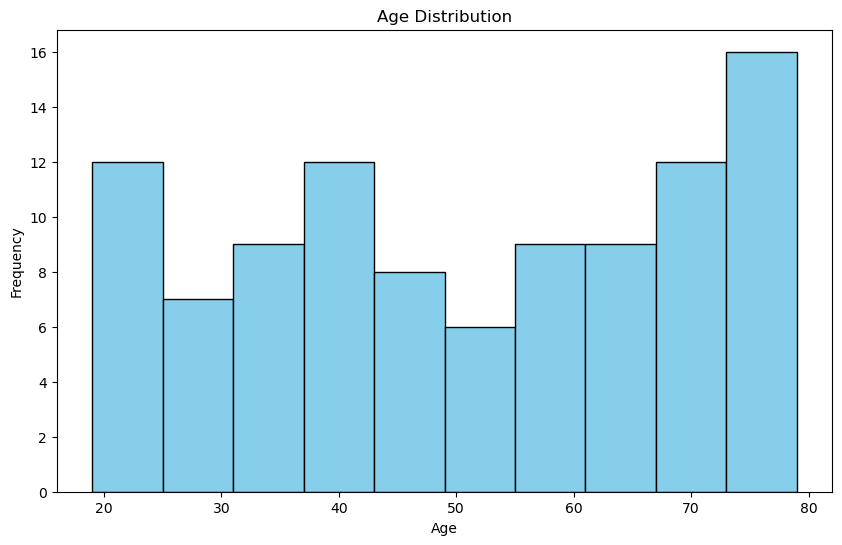

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [7]:
#How do diabetes rates vary with different levels of physical activity?
df

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol_Level,BMI,Physical_Activity,Family_History,Diabetes
0,1,56,Female,175,296,21.6,Medium,No,1
1,2,69,Female,83,239,29.4,High,Yes,0
2,3,46,Female,173,296,24.1,Low,Yes,1
3,4,32,Female,102,297,22.3,Low,Yes,0
4,5,60,Male,94,245,23.0,Low,Yes,0
...,...,...,...,...,...,...,...,...,...
95,96,46,Male,159,203,34.0,Medium,Yes,0
96,97,35,Female,172,207,34.1,Medium,No,0
97,98,43,Male,82,216,32.7,High,No,0
98,99,61,Male,99,253,28.8,Medium,Yes,0


In [9]:
activity_diabetes_rate = df.groupby('Physical_Activity')['Diabetes'].value_counts()
activity_diabetes_rate = activity_diabetes_rate[1]  # We only need the diabetes (1) rate

Physical_Activity  Diabetes
High               0           16
                   1           16
Low                0           22
                   1           22
Medium             0           12
                   1           12
Name: count, dtype: int64

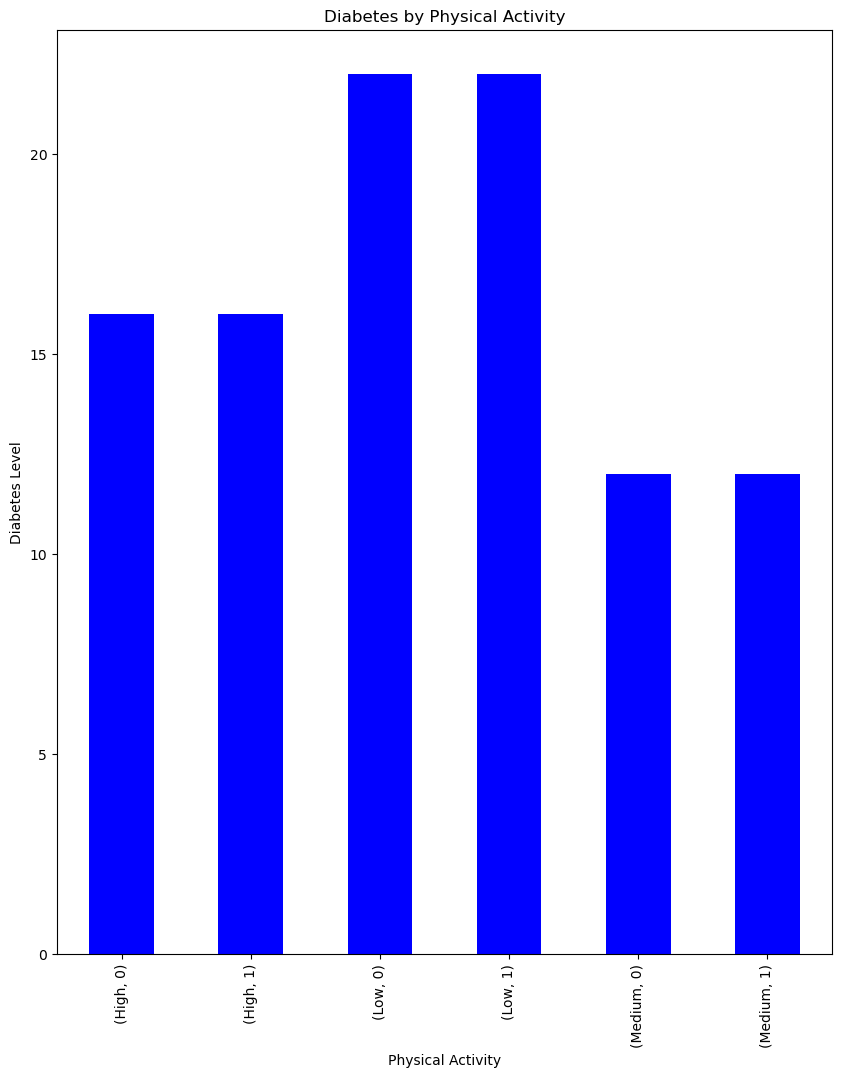

In [16]:
plt.figure(figsize=(10, 12))
activity_diabetes_rate.plot(kind='bar', color='blue')
plt.title('Diabetes by Physical Activity')
plt.xlabel('Physical Activity')
plt.ylabel('Diabetes Level')
plt.show()

In [19]:
#What is the average BMI for patients with and without diabetes?

average_bmi= df.groupby('Diabetes')['BMI'].mean()
average_bmi

Diabetes
0    25.508
1    26.098
Name: BMI, dtype: float64

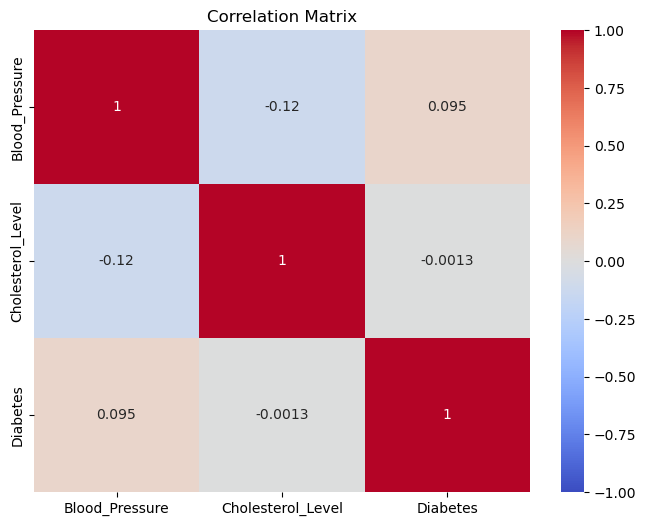

,Blood_Pressure,Cholesterol_Level,Diabetes
Blood_Pressure,1.000000,-0.117513,0.095282
Cholesterol_Level,-0.117513,1.000000,-0.001332
Diabetes,0.095282,-0.001332,1.000000


In [25]:
#Is there a correlation between blood pressure, cholesterol level, and diabetes?

find_corre = df[['Blood_Pressure', 'Cholesterol_Level', 'Diabetes']].corr()

find_corre

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(find_corre, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
find_corre


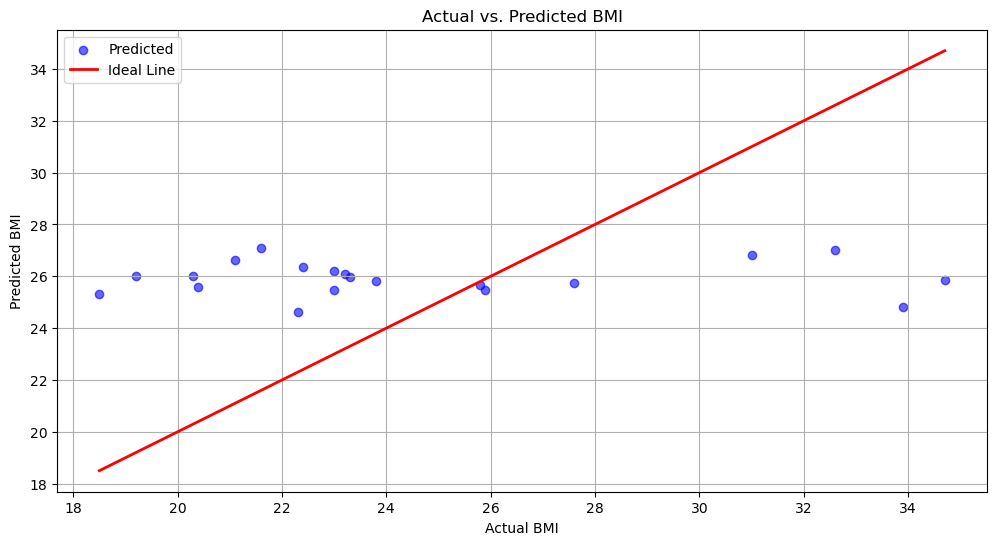

In [33]:
#Can we predict a patient's BMI based on their age and blood pressure?

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = df[['Age', 'Blood_Pressure']]
y = df['BMI']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Line')
plt.title('Actual vs. Predicted BMI')
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse

24.173109996698738

In [41]:
r2

-0.07734829022260548

In [55]:
df

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol_Level,BMI,Physical_Activity,Family_History,Diabetes,Physical_Activity_Numeric
0,1,56,Female,175,296,21.6,Medium,No,1,NaN
1,2,69,Female,83,239,29.4,High,Yes,0,NaN
2,3,46,Female,173,296,24.1,Low,Yes,1,NaN
3,4,32,Female,102,297,22.3,Low,Yes,0,NaN
4,5,60,Male,94,245,23.0,Low,Yes,0,NaN
...,...,...,...,...,...,...,...,...,...,...
95,96,46,Male,159,203,34.0,Medium,Yes,0,NaN
96,97,35,Female,172,207,34.1,Medium,No,0,NaN
97,98,43,Male,82,216,32.7,High,No,0,NaN
98,99,61,Male,99,253,28.8,Medium,Yes,0,NaN


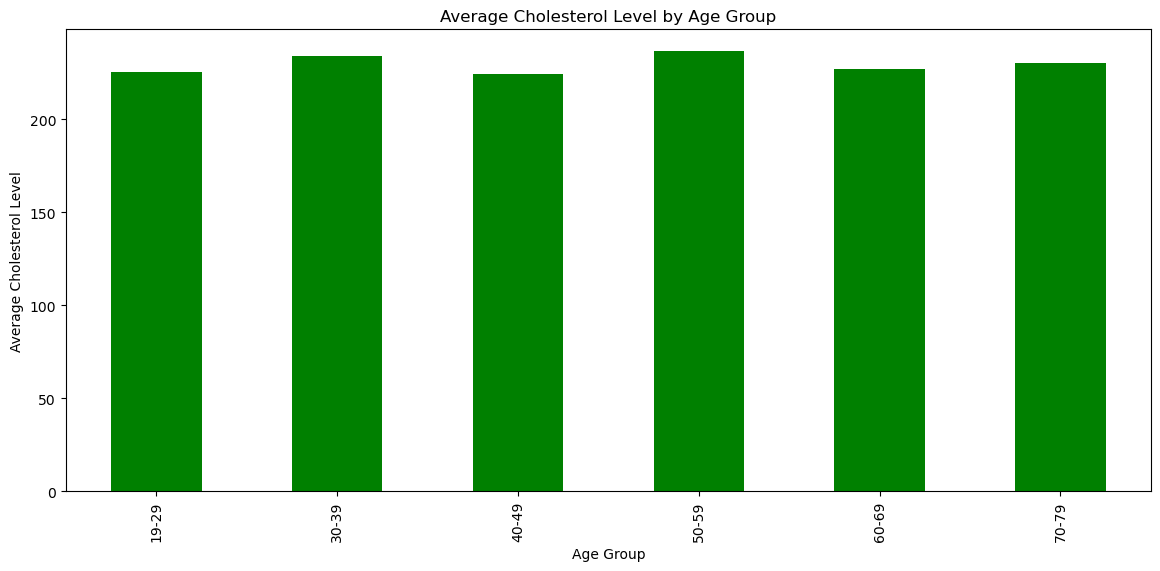

In [62]:
#What is the relationship between cholesterol level and age?
age_bins = [18, 30, 40, 50, 60, 70, 80]  # Define age ranges
age_labels = ['19-29', '30-39', '40-49', '50-59', '60-69', '70-79']  # Labels for the age groups
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

age_group_cholesterol = df.groupby('Age_Group')['Cholesterol_Level'].mean()

age_group_cholesterol.plot(kind='bar', color='green', figsize=(14, 6))
plt.xlabel('Age Group')
plt.ylabel('Average Cholesterol Level')
plt.title('Average Cholesterol Level by Age Group')
plt.show()

In [63]:
df

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol_Level,BMI,Physical_Activity,Family_History,Diabetes,Physical_Activity_Numeric,Age_Group
0,1,56,Female,175,296,21.6,Medium,No,1,NaN,50-59
1,2,69,Female,83,239,29.4,High,Yes,0,NaN,60-69
2,3,46,Female,173,296,24.1,Low,Yes,1,NaN,40-49
3,4,32,Female,102,297,22.3,Low,Yes,0,NaN,30-39
4,5,60,Male,94,245,23.0,Low,Yes,0,NaN,60-69
...,...,...,...,...,...,...,...,...,...,...,...
95,96,46,Male,159,203,34.0,Medium,Yes,0,NaN,40-49
96,97,35,Female,172,207,34.1,Medium,No,0,NaN,30-39
97,98,43,Male,82,216,32.7,High,No,0,NaN,40-49
98,99,61,Male,99,253,28.8,Medium,Yes,0,NaN,60-69


Accuracy: 0.50
Confusion Matrix:
[[5 7]
 [3 5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.42      0.50        12
           1       0.42      0.62      0.50         8

    accuracy                           0.50        20
   macro avg       0.52      0.52      0.50        20
weighted avg       0.54      0.50      0.50        20

ROC AUC Score: 0.42


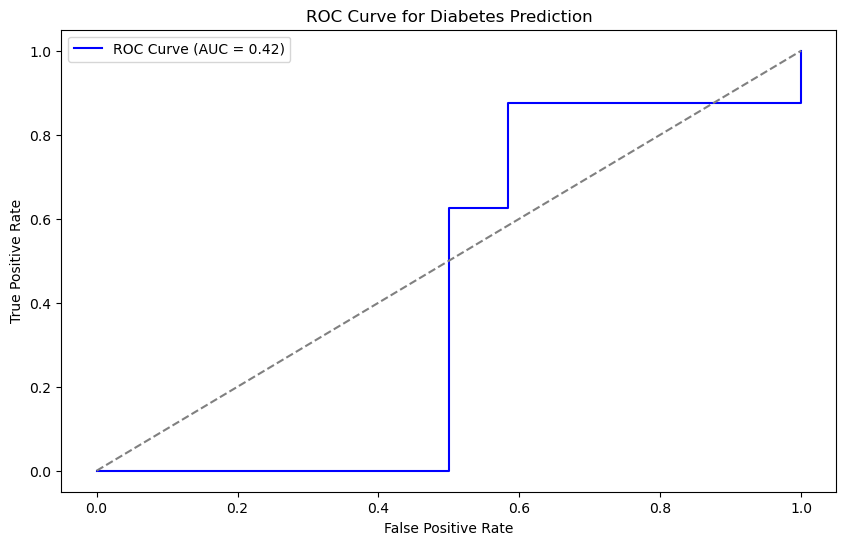

In [65]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define the features and target variable
x = df[['Age', 'Blood_Pressure', 'Cholesterol_Level', 'BMI']]
y = df['Diabetes']  # 0 for No, 1 for Yes

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]  # Probability of the positive class

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.legend()
plt.show()
